In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Read the datafile
data = pd.read_csv('../netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#Here we can see general information of our dataset, here columns like director and cast have nulls values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [18]:
#Amount of null values by column
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
#Columns names
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
#Show the unique values of the column 'type'
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

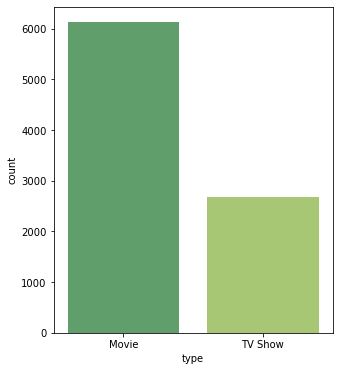

In [13]:
#Plot in the number of moves versus tv series
plt.figure(figsize=(5, 6))
sns.countplot(x=data['type'], data=data, palette='summer')

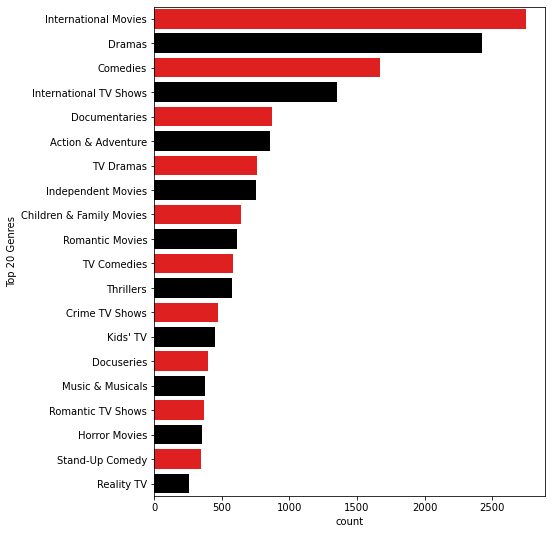

In [45]:
#Extract the genres
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(7,9))
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20],palette=('Red','Black'))
plt.ylabel('Top 20 Genres')
plt.show()

In [14]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
data['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

<AxesSubplot:xlabel='rating', ylabel='count'>

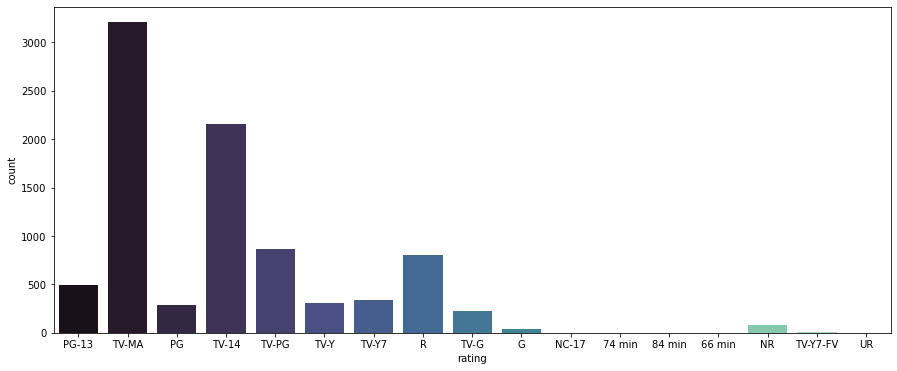

In [26]:
plt.figure(figsize=(15, 6))
sns.countplot(x=data['rating'], data=data, palette='mako')

In [65]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

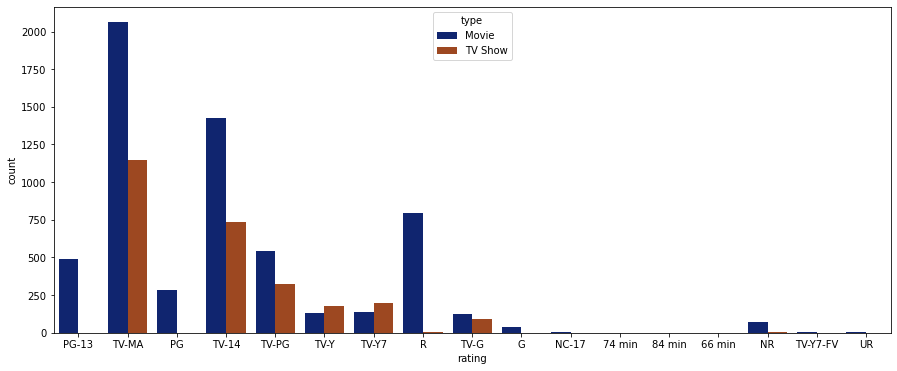

In [25]:
plt.figure(figsize=(15, 6))
sns.countplot(x=data['rating'], data=data, palette='dark', hue=data['type'])

In [27]:
#Extract only the movies
data_movie = data[data['type'] == 'Movie']
data_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [32]:
#Count all the movies for every director
data_director = data_movie["director"].value_counts()[1:]
data_director

Raúl Campos, Jan Suter        18
Suhas Kadav                   16
Marcus Raboy                  15
Jay Karas                     14
Cathy Garcia-Molina           13
                              ..
Dennis Rovira van Boekholt     1
Naoto Amazutsumi               1
Jenny Gage                     1
Kaila York                     1
Mozez Singh                    1
Name: director, Length: 4353, dtype: int64

In [33]:
#Extract a serie, need transform to DataFrame
type(data_director)

pandas.core.series.Series

In [34]:
#Transform the series to a dataframe
data_directorFrame = pd.DataFrame(data_director)
data_directorFrame.head()

,director
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13


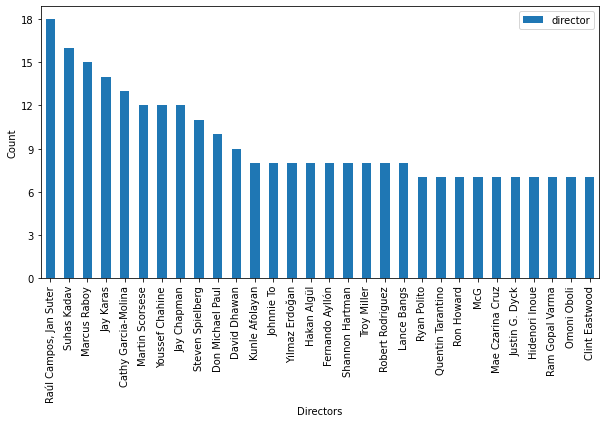

In [59]:
#Now we can plot all the the top 20 directors
data_directorFrame[:30].plot(kind='bar', figsize=[10,5])
plt.ylabel('Count')
plt.xlabel('Directors')
plt.yticks([0,3,6,9,12,15,18])
plt.show()

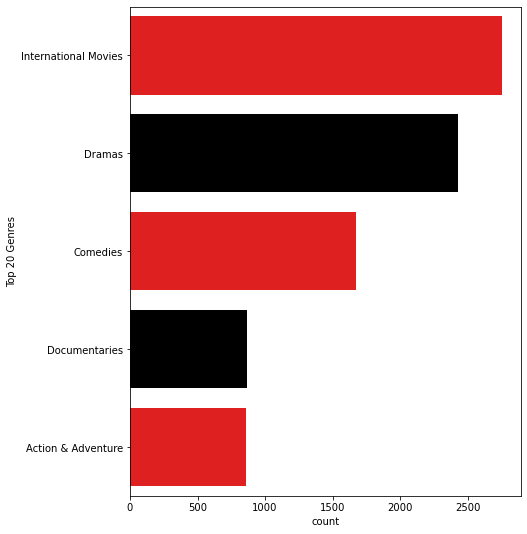

In [47]:
#Most common genres by movie
filtered_genres_movies = data_movie.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(7,9))
sns.countplot(y = filtered_genres_movies, order=filtered_genres_movies.value_counts().index[:5],palette=('Red','Black'))
plt.ylabel('Top 20 Genres')
plt.show()

In [51]:
#Most common genre by tv series
#Extract only the movies
data_show = data[data['type'] == 'TV Show']
data_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [52]:
data_director_serie = data_show["director"].value_counts()[1:]
data_director_serieF = pd.DataFrame(data_director_serie)
data_director_serieF.head()

,director
Rob Seidenglanz,2
Hsu Fu-chun,2
Iginio Straffi,2
Shin Won-ho,2
Ken Burns,2


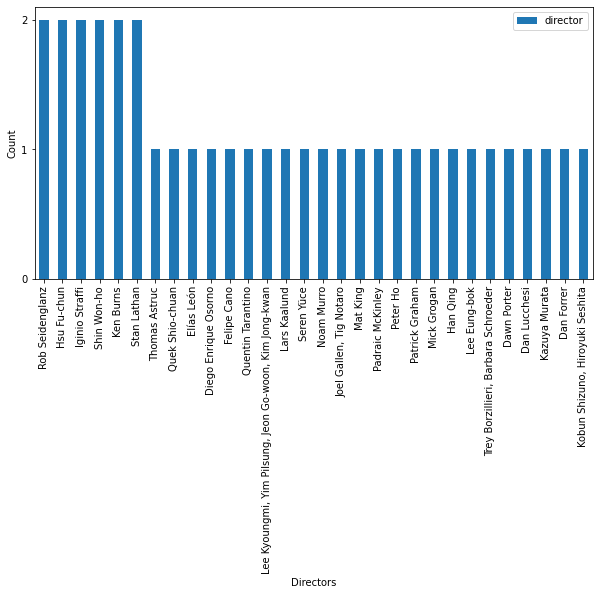

In [56]:
#See the difference of tv shows by director versus movies
data_director_serieF[:30].plot(kind='bar', figsize=[10,5])
plt.ylabel('Count')
plt.xlabel('Directors')
plt.yticks([0,1,2])
plt.show()

<AxesSubplot:xlabel='count', ylabel='country'>

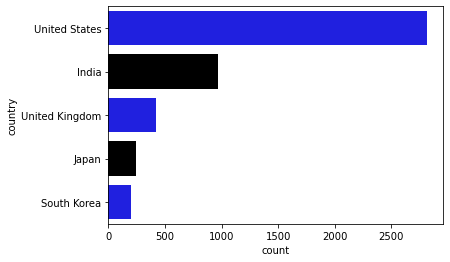

In [63]:
sns.countplot(y="country", data=data, order=data['country'].value_counts().index[0:5],palette=('blue','Black'))